### 支持向量机可视化

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

#### 创建数据

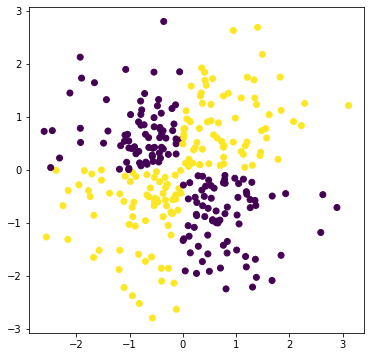

In [8]:
rs = np.random.RandomState(256) # 生成种子，生成随机数，固定值
x = rs.randn(300, 2)
# 根据象限进行划分 一三象限小于0，二四象限大于0为1 分为两类
y = [1 if i > 0 else 0 for i in x[:, 0] * x[:, 1]]
plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], c=y)

#### 建模

In [9]:
svc = SVC(kernel='rbf')
svc.fit(x, y)

SVC()

#### 创建测试数据

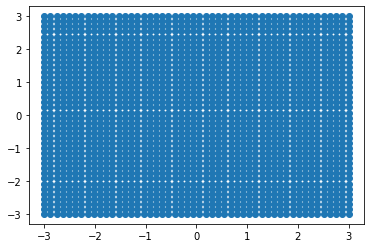

In [15]:
x1 = np.linspace(-3, 3, 50)
x2 = np.linspace(-3, 3, 40)
# display(x1.shape, x2.shape)
x1, x2 = np.meshgrid(x1, x2) # meshgrid：生成网格点坐标矩阵
# display(x1.shape, x2.shape)
# 创建测试数据  column_stack:列合并
x_test = np.column_stack([x1.ravel(), x2.ravel()])

plt.scatter(x_test[:, 0], x_test[:, 1])

#### 预测

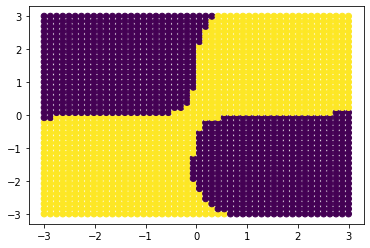

In [16]:
y_pred = svc.predict(x_test)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred)

#### 算法原理可视化

In [17]:
# 算出距离
d = svc.decision_function(x_test) # 36000个距离
d

array([0.079971  , 0.10462285, 0.13479132, ..., 0.35628518, 0.32494884,
       0.29658013])

In [18]:
d.max()

2.9845329803598983

In [19]:
d.min()

-3.3734036211098513

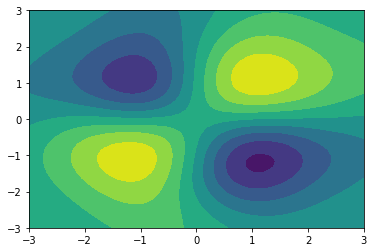

In [22]:
# 轮廓图
plt.contourf(x1,x2, d.reshape(40, 50))

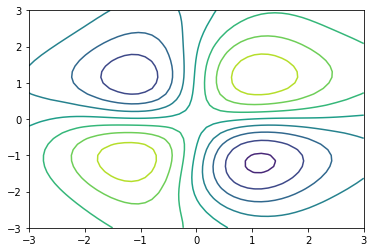

In [23]:
plt.contour(x1,x2, d.reshape(40, 50))

#### 3D显示距离

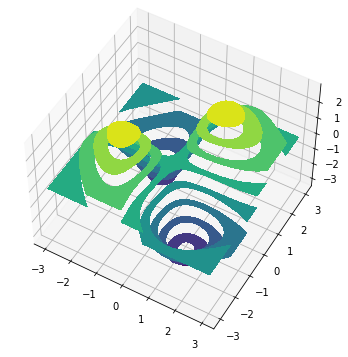

In [26]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='3d')
ax.contourf(x1,x2, d.reshape(40, 50))
ax.view_init(50, -60)

### SVC参数优化

In [35]:
import numpy as np 
from sklearn.svm import SVC

# 定义一个方法，用来加载数据
def read_data(path):
    # 打开指定路径下的文件
    with open(path) as f:
        lines = f.readlines()
    lines = [eval(line.strip()) for line in lines]
    X, y = zip(*lines)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [37]:
X_train, y_train = read_data('./data/train_data')
display(X_train.shape, y_train.shape)

(500, 2)

(500, 1)

In [38]:
np.unique(y_train)

array([0, 1])

In [39]:
X_test, y_test = read_data('./data/test_data')
display(X_test.shape, y_test.shape)

(100, 2)

(100, 1)

In [46]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train.ravel())
svc.score(X_test, y_test.ravel())

0.83

In [55]:
# 进行条件筛选
from sklearn.model_selection import GridSearchCV  # GridSearchCV:交叉验证网格搜索

In [52]:
%%time
svc = SVC(kernel='sigmoid')
# C：正则化参数  tol:精确度
params = {'C': np.logspace(-3, 3, 50), 'tol': [0.0001, 0.001, 0.01, 0.1, 1]}
# estimator:声明的参数 这里声明的是svc【支持向量机】  param_grid：参数 字典的格式
gc = GridSearchCV(estimator=svc, param_grid=params, cv=5) # cv交叉验证 默认是5
gc.fit(X_train, y_train.ravel())

Wall time: 11.5 s


GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1]})

In [53]:
gc.best_params_  # 最合适的参数 

{'C': 0.21209508879201905, 'tol': 0.0001}

In [54]:
gc.score(X_test, y_test.ravel())  # 得到测试后的分数

0.98